<a href="https://colab.research.google.com/github/CamiloEFB/multiclassification_pet_breeds/blob/main/multiclassification_pet_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install fastbook


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:

from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [20]:
Path.BASE_PATH = path


In [21]:
path.ls()


(#2) [Path('images'),Path('annotations')]

In [22]:
(path/"images").ls()


(#7393) [Path('images/newfoundland_127.jpg'),Path('images/Siamese_40.jpg'),Path('images/saint_bernard_130.jpg'),Path('images/leonberger_55.jpg'),Path('images/Persian_89.jpg'),Path('images/pug_18.jpg'),Path('images/american_bulldog_9.jpg'),Path('images/British_Shorthair_78.jpg'),Path('images/pug_40.jpg'),Path('images/scottish_terrier_87.jpg')...]

In [23]:
fname = (path/"images").ls()[0]


In [24]:
re.findall(r'(.+)_\d+.jpg$', fname.name)


['newfoundland']

In [25]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

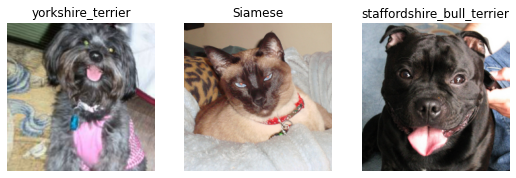

In [26]:
dls.show_batch(nrows=1, ncols=3)

In [78]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(224)) # Resize all images to 224x224 pixels
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_164.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_164.jpg
    applying partial gives
      Maine_Coon
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(6)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(6))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item

In [28]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.472926,0.350812,0.108931,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.516055,0.360984,0.112991,01:27
1,0.317206,0.237710,0.078484,01:29


In [29]:
x,y = dls.one_batch()


In [30]:
y

TensorCategory([24, 21, 18,  2, 32,  4, 36, 19, 32, 26, 33, 22, 11,  3, 11,  7,
                13, 30, 29, 14, 33,  8, 12, 10, 16, 26, 17, 19, 18, 19,  2,  3,
                 5,  0, 28,  3, 33, 26,  8, 10,  0,  0, 12,  3,  3,  6, 16, 34,
                 5, 12, 24, 24, 17,  9, 22, 29, 36, 36,  5,  3, 28, 12, 27, 35],
               device='cuda:0')

In [31]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([5.6422e-08, 2.1281e-09, 3.9107e-06, 3.0910e-08, 4.2518e-07,
            1.7536e-08, 2.7437e-06, 1.2225e-06, 3.3422e-06, 4.6380e-06,
            2.5843e-07, 1.4237e-07, 1.3586e-08, 8.0493e-08, 4.5667e-09,
            3.8594e-08, 8.7094e-08, 4.3720e-07, 1.0004e-08, 6.7963e-08,
            1.3154e-08, 1.1603e-06, 1.5189e-06, 1.8694e-07, 9.9991e-01,
            3.0184e-05, 3.9255e-08, 3.3933e-07, 2.1808e-05, 2.4455e-06,
            2.2080e-09, 1.4825e-06, 1.0177e-06, 5.6101e-06, 5.3131e-07,
            1.8080e-06, 5.0547e-08])

In [32]:
len(preds[0]),preds[0].sum()


(37, TensorBase(1.0000))

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


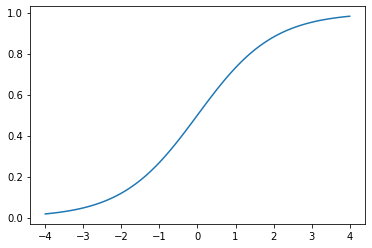

In [33]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

input = torch.linspace(-4, 4, 100)
output = F.sigmoid(input)
plt.plot(input, output)
plt.show()

In [34]:
torch.random.manual_seed(42);

In [35]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [36]:
acts.sigmoid()


tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [37]:
(acts[:,0]-acts[:,1]).sigmoid()


tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [38]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [39]:
targ = tensor([0,1,0,1,1,0])


In [40]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [41]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [43]:
from IPython.display import HTML
import pandas as pd
import re

# Create a data frame from the softmax activations, target labels and indices
df = pd.DataFrame(sm_acts, columns=["3", "7"])
df["targ"] = targ
df["idx"] = idx

# Add a column for the result of the prediction
df["result"] = sm_acts[range(6), targ]

# Hide the index column and display the data frame as HTML
t = df.style.hide_index()

# To have HTML code compatible with our script
html = t._repr_html_().split("<")[1]
html = re.sub(r"<", r"&lt;", html)
display(HTML(html))

In [45]:
-sm_acts[idx, targ]


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [46]:
F.nll_loss(sm_acts, targ, reduction='none')


tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

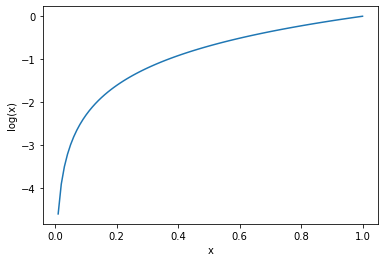

In [48]:
# plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')



# Define the x and y values using torch
x = torch.linspace(0, 1, 100) # 100 points between 0 and 1
y = torch.log(x) # Apply the log function to x

# Plot the data using matplotlib.pyplot
plt.plot(x, y)
plt.xlabel("x") # Add a label for the x-axis
plt.ylabel("log(x)") # Add a label for the y-axis
plt.show() # Show the plot

In [57]:
from fastbook import *

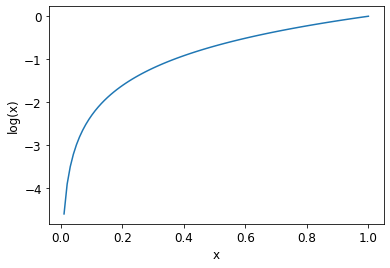

In [58]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')


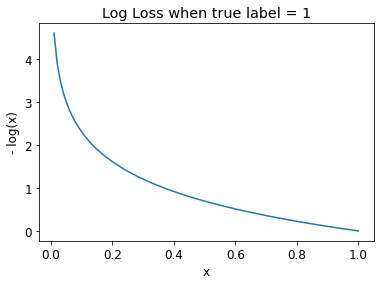

In [59]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')


In [61]:
loss_func = nn.CrossEntropyLoss()


In [62]:
loss_func(acts, targ)


tensor(1.8045)

In [63]:
F.cross_entropy(acts, targ)


tensor(1.8045)

In [64]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)


tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

##Evaluation of the model


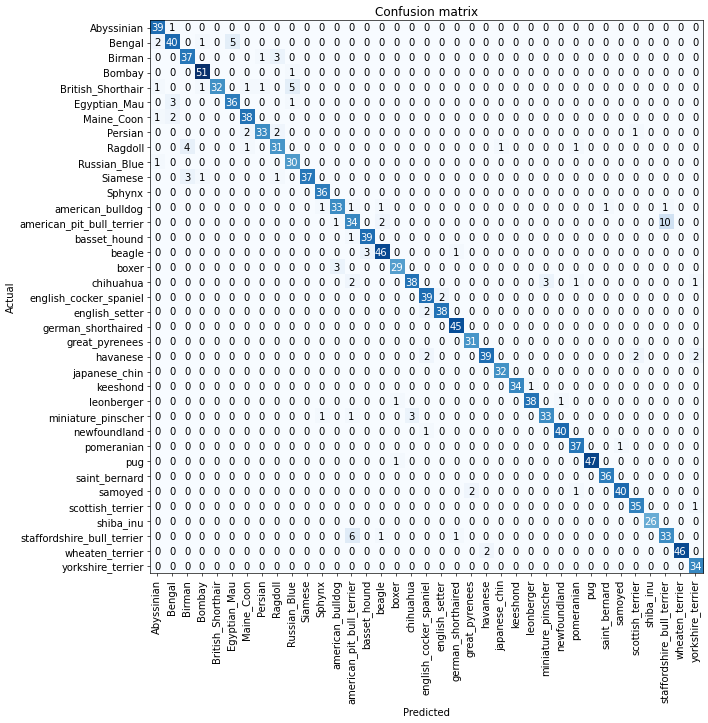

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [66]:
interp.most_confused(min_val=5)


[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('British_Shorthair', 'Russian_Blue', 5)]

In [67]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.659469,4.379378,0.458051,01:28


epoch,train_loss,valid_loss,error_rate,time
0,3.668972,2.633639,0.573072,01:32


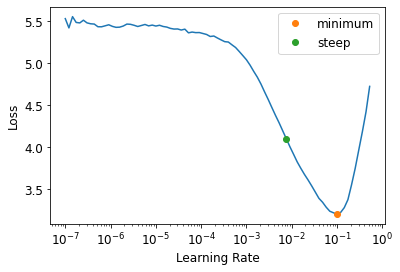

In [68]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [69]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")


Minimum/10: 1.00e-02, steepest point: 7.59e-03


In [70]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.311308,0.345577,0.115020,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.508785,0.344876,0.101489,01:30
1,0.323259,0.271550,0.086604,01:35


In [71]:
learn.fine_tune??

In [72]:

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.150402,0.429469,0.134641,01:26
1,0.533859,0.263236,0.085250,01:26
2,0.301871,0.244398,0.071719,01:25


In [73]:
learn.unfreeze()


In [74]:
learn.fit_one_cycle(6, lr_max=1e-5)


epoch,train_loss,valid_loss,error_rate,time
0,0.273285,0.231558,0.069012,01:30
1,0.257109,0.226878,0.067659,01:38
2,0.213283,0.219045,0.069012,01:32
3,0.194391,0.218308,0.068336,01:30
4,0.192716,0.220311,0.069689,01:32
5,0.185172,0.214669,0.067659,01:31


In [75]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.101277,0.410398,0.126522,01:27
1,0.508136,0.273734,0.087280,01:26
2,0.315769,0.259428,0.090663,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.253638,0.255299,0.087280,01:31
1,0.257498,0.242355,0.083897,01:32
2,0.232168,0.234383,0.087280,01:31
3,0.214403,0.224474,0.077808,01:31
4,0.175296,0.225937,0.081191,01:32
5,0.176361,0.223269,0.077131,01:31
6,0.148630,0.224432,0.078484,01:31
7,0.140641,0.221803,0.076455,01:32
8,0.139790,0.213340,0.075101,01:32
9,0.130854,0.210310,0.073748,01:32


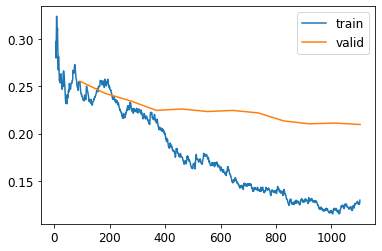

In [76]:
learn.recorder.plot_loss()


## best model

In [77]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)
     

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.279945,0.311311,0.101489,01:27
1,0.553257,0.325738,0.104871,01:24
2,0.409474,0.288557,0.092693,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.282403,0.327643,0.100812,01:27
1,0.290609,0.324213,0.092016,01:27
2,0.225703,0.289969,0.083897,01:27
3,0.153292,0.255831,0.071042,01:28
4,0.090157,0.242980,0.062923,01:27
5,0.059228,0.238955,0.062923,01:36
